# Sentiment Analysis

What you'll learn in this Notebook:

- What sentiment analysis is
- How it works
- How to run it yourself
- How to run it on a dataset and visualise the overall output


## 1. What is Sentiment Analysis and where is it used?

Sentiment analyis is a computational technique used for analysing text to determine its sentiment, for example, whether the text conveys positive, negative or neutral sentiment.

It is often used in commercial settings (and sometimes called opionion mining) and is applied to social media, online review data or surveys, for example, to determine automatically how customers or people express themselves about different brands or products and to analyse what positive and negative words they are using to express themselves.  During political elections sentiment analysis is also used to determine how people feel about different parties and candidates.

Large amounts of social media data, like Twitter Tweets or Reddits posts, can be analysed in this way to determine trends over time and monitor where things work well or go wrong.

## 2. How does it work?

There are different methods used for performing sentiment analysis.  For example, there are lexicon-lookup methods where each word in a piece of text is checked automatically against a lexicon of positive and negative words to see if it appear in that lexicon.  The more positive or negative words occur the stronger is the sentiment each way.  In this course you will learn how to use a lexicon-based method.

There are also machine learning and deep learning methods that can be applied to sentiment analysis. This is where data annotated for sentiment by humans is used to train a model which can then be used to classify new data based on what it has learned during training.  We won't cover these approaches in this course, but if you are interested in such learning-based methods which are able to consider the context, as well as representing the meanings of the words in the text mathematically, then check out the two sources below by Lui (2020) and Agarwal et al., (2020).

- Liu, B., 2020. Sentiment analysis: Mining opinions, sentiments, and emotions. Cambridge University Press. https://doi.org/10.1017/9781108639286
- Agarwal, B., Nayak, R., Mittal, N. and Patnaik, S. eds., 2020. Deep learning-based approaches for sentiment analysis. Singapore: Springer.

## 3. Sentiment Analysis using TextBlob

In this course you'll learn how to use [TextBlob](https://textblob.readthedocs.io/en/dev/) for sentiment analysis. TextBlob is a Python library developed to work with another natural language processing (NLP) tool called the Natural Language Toolkit ([NLTK](https://www.nltk.org)).  NLTK provides access to the lexicons which are required for computing sentiment. So TextBlob uses a lexicon-based approach for performing sentiment analysis.

TextBlob computes sentiment using two values: polarity and subjectivity.  

**Polarity** is a value between 1 and -1. The closer the value is to 1, the more positive the sentiment of the text is considered to be.  The closer the value is to -1, the more negative it is.  

**Subjectivity** represents whether a piece of text is more of a personal opinion or something more factual. The subjectivity value lies between 0 and 1.  The closer it is to 1, the more subjective the text is and the closer it is to 0 the more factual it is.

Imagine your friend says to you "I really hate this day. Everything is going wrong." The sentiment of their utterance is overall very negative in polarity, but their statement is also quite subjective.

Let's see how TextBlob works in action ...

## 4. Running a Sentiment Analyser

### Installing the tool

You first need to install TextBlob, the sentiment analysis tool we're using on this course, onto your own computer.  To install it you just need to run the following line of code.  Note that this may take a while and will generate some messages (and sometimes warnings) when installing all the libraries that are needed. Once the code cell finishes running (i.e. the asterix in the square bracket changes to a number),  move onto the next cell.

In [ ]:
!pip install textblob

### Importing the tool

Next you have to import the library like this:

In [1]:
from textblob import TextBlob

### Running the tool

You can run TextBlob on piece of text using just one line of code and store the output in the ```blob``` variable:

In [2]:
blob = TextBlob("He's not happy.")
print(blob)

He's not happy.


You can see that TextBlob is run by specifying an example sentence ("He's not happy.") in double quotes.  TextBlob actually computes various things besides sentiment.  The `blob` variable which we have just assigned stores the string you specified as well as all of the TextBlob output that was computed.  However, when printing the `blob` variable it doesn't give you the results, it only prints the text.

So to examine what the sentiment is you need to call the `.sentiment` object attribute directly on the `blob` object and store its results in a new variable (e.g. `results`), which you can then print.

An **object attribute** is a variable that belongs to one (and only one) object.  In our example, it (`.sentiment`) stores the sentiment results for the sentence "He's not happy.".

You can also get the other information which TextBlob computes but calling other object attibutes (e.g. `.words` for the words, `.tags` for part-of-speech tags or `.noun_phrases` for noun phrases) but let's stick to sentiment in this notebook.

In [3]:
result = blob.sentiment
print(result)

Sentiment(polarity=-0.4, subjectivity=1.0)


### 🐛 Mini task 4.1
You can experiment by changing words in this phrase and seeing how this changes the scores TextBlob produces (eg. "He is quite happy", "He seems very happy", "He is not very happy"). Don't forget use the code from the last two code cells above, first setting the new phrase to a TextBlob object and assigning it to the 'blob' variable and then to return the sentiment computed for the text assigned to `blob`.

What kinds of words produce higher or lower polarity and subjectivity scores?

In [9]:
# Write your solution here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

    blob = TextBlob("He is quite happy.")
    result = blob.sentiment
    print(result)

    ### END SOLUTION
    
</details>

You can also compute sentiment for longer pieces of text. For example, let's check what sentiment scores are produced when we run TextBlob on what our friend said earlier.

In [10]:
blob = TextBlob("I really hate this day. Everything is going wrong.")
result = blob.sentiment
print(result)

Sentiment(polarity=-0.65, subjectivity=0.9)


TextBlob classifies these two sentences as fairly negative in terms of polarity, and also as highly subjective.

Now let's look at how TextBlob works with negation.

In [ ]:
blob = TextBlob("I'm feeling not bad today.")
result = blob.sentiment
print(result)

TextBlob seems to recognise that there is negation in the sentence. 
Try some other examples to see if that's always the case.

### 🐛 Mini task 4.2

Now write out the code for some examples of your own. Consult the code from the previous code cell but replace it with a different string of text, for example, "Your pizzas are the best."

In [ ]:
# Write your solution here ...

<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

    blob = TextBlob("Your pizzas are the best.")
    result = blob.sentiment
    print(result)

    ### END SOLUTION
    
</details>

## 5. Running TextBlob on our data

### Loading the data

We now need to load our own dataset into the notebook so that we can analyse it. You will remember that in the notebook we worked through earlier, we produced a tab-separated version of the babysitting story script, and saved it in the 'data' directory (folder). Take a look in that directory to make sure you can see it. It's called ```Babysitting-Act3-cleaned.tsv```.

To load the file, we will import a library called `pandas`. We'll use pandas to read CSV and TSV files and store their information in column format.

In [11]:
import pandas as pd

Our file contains two columns, the first containing the name of the speaker and the second containing what each speaker said.

Pandas lets us read in the file as a data frame (like a table) using the ```read_table``` function.

We can specify the names of the columns using the ```colnames``` variable, and also specify the column separator with ```sep``` (which we will set to "\t" for tab in this case).

We store this table in the ```df``` variable, short for data frame.

We also specify the fact that the values in the text and speaker columns are strings (i.e. words not numbers).  We need to do this as TextBlob only accepts strings as input.

The last line of code (```df.head()```) shows us the header and the first five rows of the data frame we have just created and loaded in pandas. Yay!

(If you want to check more than 5 lines, type that number into the brackets after df.head. E.g. to see the first 10 lines, type (```df.head(10)```).

In [20]:
# Reading in the file as a table using pandas
colnames=['speaker', 'utterance'] 
df = pd.read_table("./data/Babysitting-Act3-cleaned.tsv", sep="\t", names=colnames)
df['speaker'] = df['speaker'].astype(str)
df['utterance'] = df['utterance'].astype(str)
df.head()

,speaker,utterance
0,@Ira Glass,This is a story that caught our interest becau...
1,@Myron Jones,"She had to say exactly where she was going, wh..."
2,@Ira Glass,"If one were to ask your mother at the time, wh..."
3,@Myron Jones,She said you've got to be more careful with th...
4,@Ira Glass,Yeah.


Because some of the utterances are longer than a single sentence, let's split the transcript into sentences before computing sentiment.

The following bit of code is a simple sentence splitter which splits each utterance string when it encounters a punctuation mark that normally marks the end of a sentence, such as a full stop, a question mark or an exclamation mark. It also expands the data frame so that each new sentence is on a new row, preceeded by its speaker.

The last line gives the instruction to print the first 25 rows of the data frame.

In [21]:
s = (df.pop('utterance')
    .str.strip('.')
    .str.strip('?')
    .str.strip('!')
    .str.split('[\.\?\!]\s+', expand=True)
    .stack()
    .rename('utterance')
    .reset_index(level=1, drop=True))

df = df.join(s).reset_index(drop=True)
df.head(25)

,speaker,utterance
0,@Ira Glass,This is a story that caught our interest becau...
1,@Ira Glass,A man in Florida named Myron Jones wrote us th...
2,@Ira Glass,"He said that when he was 16 years old, growing..."
3,@Ira Glass,He came and went as he pleased
4,@Ira Glass,"Spent a lot of time in bars, actually"
5,@Ira Glass,This was the 1940s
6,@Ira Glass,"But his sister Carol, she had different rules,..."
7,@Ira Glass,"This story gets to babysitting in a big, big way"
8,@Ira Glass,And I called him to talk about it
9,@Myron Jones,"She had to say exactly where she was going, wh..."


In the leftmost column you can see an index for each line in the table, as well as the two columns for speaker and utterance.

In [22]:
df.describe()

,speaker,utterance
count,348,348
unique,3,338
top,@Myron Jones,Yeah
freq,200,6


You can use the ```describe()``` function to give you a summary of what's in the table. When you run the next line of code you will see that the table contains 348 rows and there are three unique speakers.  The speaker uttering the most sentences is Myron Jones and the most frequent utterance is ```Yeah```. Yeah. :-)

The content of the utterance column is what we want to compute sentiment for. Let's do it.

### Computing sentiment 

We will now compute the sentiment for each row of text.

To do this we use two lambda functions to determine the polarity and subjectivity for each line of text in the data frame.

A **lambda function** is a small anonymous function in Python.  It can take any number of arguments, but can only have one expression.

We apply the lambda functions to each text cell in the data frame, and store their results in the data frame in two additional columns called polarity and subjectivity.

In [24]:
# Computing polarity and subjectivity for each line in the 'utterance' column
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['utterance'].apply(polarity)
df['subjectivity'] = df['utterance'].apply(subjectivity)

### 🐛 Minitask 5.1 

Now check how the first few lines of the data frame look like.  Remember you can use the ```head()``` function to do this.

In [25]:
# Write your solution here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

    df.head()
 
    ### END SOLUTION
    
</details>

## 6. Visualising sentiment

Now let's visualise sentiment so that we can display and understand the results more easily than trying to make sense of long columns of numbers.

### Visualising each result by colour

The following line of code visualises the polarity and subjectivity in the table using colours. It's quite a long line of code but all it does is set a colour background to the cells containing the sentiment scores.

Polarity is displayed as a colour ranging between red, yellow and green, <font color="red">red</font> signaling negative sentiment, <font color="green">green</font> signalling positive sentiment and <font color="gold">light orange</font> being neutral.  Subjectivity is displayed on a grey scale with white signalling statements deemed factual, and black signalling statements deemed subjective.

In [ ]:
df.style.background_gradient(subset='polarity', cmap='RdYlGn', axis=None).background_gradient(subset=['subjectivity'], cmap='Greys', axis=None)

### 🐛 Mini task 6.1

Look at some of the individual rows and compare the positive or negative scores to the vocabulary used. How accurate does the sentiment analysis seem to you as a human reader? Where has it gone wrong, and why?

### Visualising sentiment in one graph

We will now display the sentiment results for the entire story in a single graph. We'll plot polarity on the x-axis and subjectivity on the y-axis.

You don't need to understand the following bit of code in detail, though I've added some explanations in the comments.  One thing to know is that we use a library called ```matplotlib``` for creating the graph. 

After an initial setup of the figure size, the code goes through the data frame to collect all the scores, store them in a list and display them on the graph, plotting each sentence as one polarity/subjectivity coordinate.

The code also keeps track of instances when the same coordinates are repeated, so that pairs which occur frequently are displayed as larger dots.

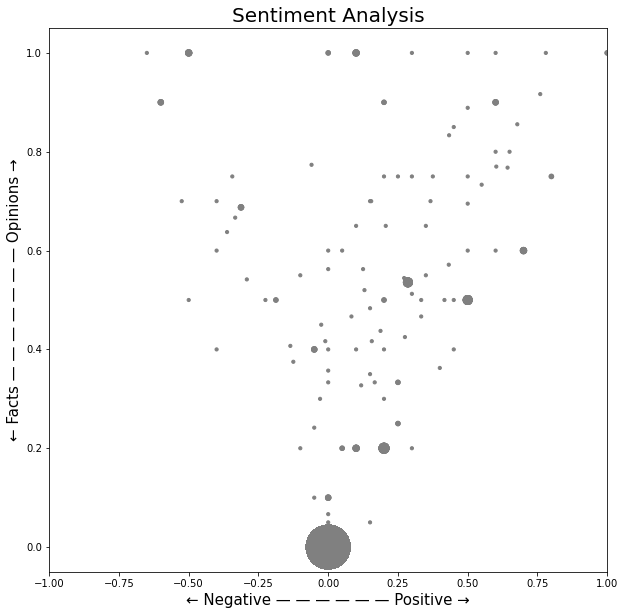

In [28]:
# Visualising the results in one graph showing:
# subjectivity on the y-axis
# polarity on the x-axis

# import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# set up the size of the figure
plt.rcParams['figure.figsize'] = [10, 10]

# create two empty lists for the x and y coordinates
x=[]
y=[]

# add the polarity values as x coordinates and
# the subjectivity values as the y coordinates
for (index, row) in df.iterrows():
    x.append(row.loc['polarity'])
    y.append(row.loc['subjectivity'])

# increase the dot size in case there are multiple coordinate pairs
from collections import Counter
# count the occurrences of each point
c = Counter(zip(x,y))
# create a list of the sizes, here multiplied by 10 for scale
s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]

# make the scatter plot using gray as the colour for each dot
plt.scatter(x, y, s, color='Gray')

# specify the title
plt.title('Sentiment Analysis', fontsize = 20)

# set lables on axes
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

# set the x-axis range to the entire polarity range (-1.0 to 1.0)
plt.xlim([-1.0, 1.0])

# show the plot
plt.show()

If we assume that the sentiment analysis is more or less accurate, we can conclude from this graph that, aside from the neutral utterances, the story tends towards beeing slightly more positive than negative, and is angled slightly more towards the subjective than the factual. How well does this accord with your own impressions of the story as a human reader?

When companies do this kind of analysis (on texts other than literary ones), they are interested in these kind of trends and how they change over time, but they also want to see examples of particular outliers to see what customers are happy or unhappy about in terms of products and services.

When doing literary analysis, however, we are likely to be interested in other aspects of a text. We might for instance want to examine sentiment by character or speaker.

### Visualising sentiment by speaker

Here we create the same graph but using a different colour for each speaker.  Our data set contains three speakers: <font color="purple">Ira Glass</font>, <font color="orange">Myron Jones</font> and <font color="green">Carol Jones</font>.

You don't need to understand the following bit of code in detail, though I've added some explanations in the comments.  Essentially the only difference to the previous cell is that the code collects the data by speaker first before it plots it in the different colours.

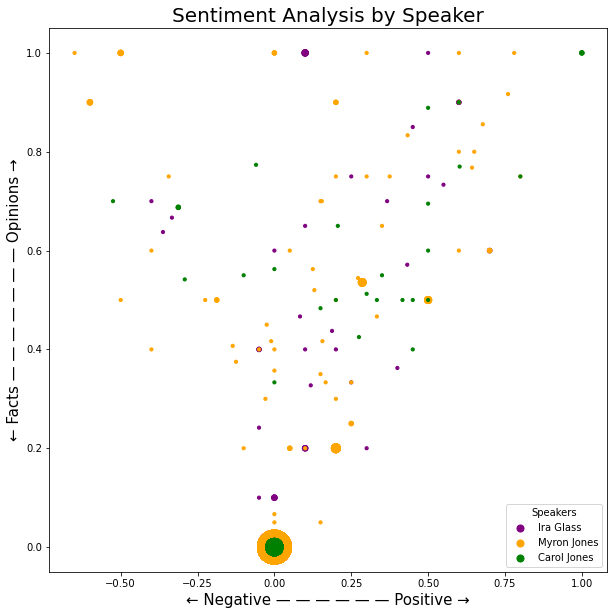

In [29]:
# Sentiment analysis by speaker

# set up the size of the figure
plt.rcParams['figure.figsize'] = [10, 10]

# create empty x and y coordinate lists for each of the three speakers
ira_x=[]
ira_y=[]
myron_x=[]
myron_y=[]
carol_x=[]
carol_y=[]

# loop through the data frame and assign the x and y coordinates
# to the correct list depending on the speaker
for (index, row) in df.iterrows():
    x=row.loc['polarity']
    y=row.loc['subjectivity']
    speaker=row.loc['speaker']
    if speaker == "@Ira Glass":
        ira_x.append(x)
        ira_y.append(y)
    elif speaker == "@Myron Jones":
        myron_x.append(x)
        myron_y.append(y)
    elif speaker == "@Carol Jones":
        carol_x.append(x)
        carol_y.append(y)

# function to increase the dot size in case there are multiple coordinate pairs      
def getSize(x,y):
    # count the occurrences of each point
    c = Counter(zip(x,y))
    # create a list of the sizes, here multiplied by 10 for scale
    s = [10*c[(xx,yy)] for xx,yy in zip(x,y)]
    return s

# create scatter plots by speaker
ira = plt.scatter(ira_x, ira_y, s=getSize(ira_x,ira_y), color='Purple')
myron = plt.scatter(myron_x, myron_y, s=getSize(myron_x,myron_y), color='Orange')
carol = plt.scatter(carol_x, carol_y, s=getSize(carol_x,carol_y), color='Green')

# specify the title
plt.title('Sentiment Analysis by Speaker', fontsize = 20)

# set lables of axes
plt.xlabel('← Negative — — — — — — Positive →', fontsize=15)
plt.ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

# add legend
lgnd = plt.legend((ira, myron, carol),
           ('Ira Glass', 'Myron Jones', 'Carol Jones'),
           loc='lower right')
lgnd.set_title("Speakers")
for handle in lgnd.legendHandles:
    handle.set_sizes([50.0])

# show the plot
plt.show()

You can see that Carol's utterances are represented as slightly more positive and subjective than those of Ira and Myron, although Carol is the person who speaks the least. You can work this out mathematically by determining the average scores per speaker and plotting them in a bar plot. This is done by grouping the data frame by speaker and polarity (or subjectivity) using the ```groupby()``` function. We'll first plot mean polarity scores.

<AxesSubplot:title={'center':'Mean Polarity Scores'}, xlabel='Speaker', ylabel='Polarity'>

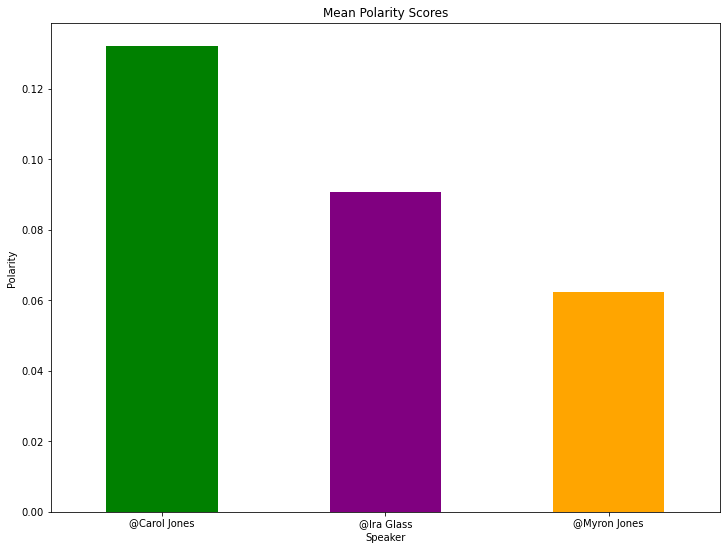

In [30]:
#generate mean of sentiment score per speaker
dfg = df.groupby(['speaker'])['polarity'].mean()

#create a bar plot
dfg.plot(color=['Green', 'Purple', 'Orange'], kind='bar', title='Mean Polarity Scores', ylabel='Polarity',
         xlabel='Speaker', figsize=(12, 9), rot=0)

You can also plot the sentiment as a histogram and get a better idea of how each speaker's scores are distributed. After running the code below, you will see that Carol Jones's utterances are the most spread out in terms of their polarity, while Myron Jones's utterances are assessed as being mostly neutral to slightly positive. Ira Glass's utterances are mostly neutral, which perhaps makes sense as he is the interviewer. You can see how this kind of analysis can be used to build up what you might think of as the 'sentiment profile' of a character.

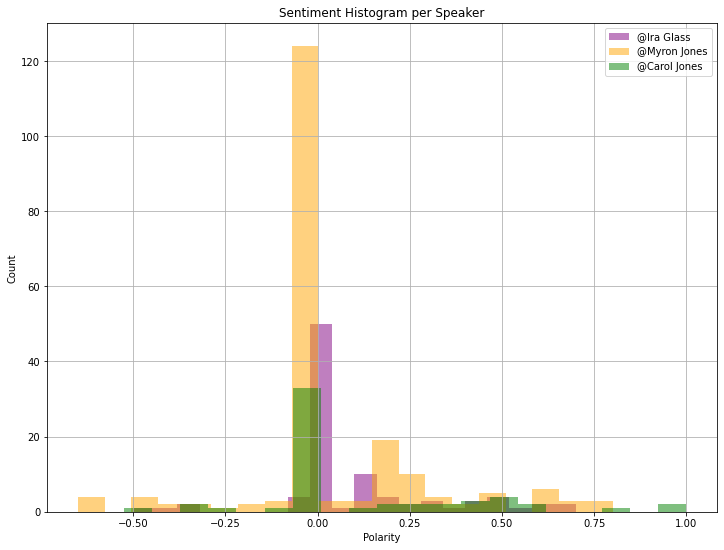

In [31]:
fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

speakers = ['@Ira Glass','@Myron Jones','@Carol Jones']
colours = ['Purple','Orange','Green']

for index, speaker in enumerate(speakers):
    df[df['speaker']==speaker]['polarity'].hist(ax=ax1, bins=20, color=colours[index], label=speaker, alpha=0.5)

plt.title('Sentiment Histogram per Speaker')
plt.xlabel("Polarity")
plt.ylabel("Count")
plt.legend()
plt.show()

### 🦋 Extra task 6.2 (optional): 

If you have finished everything else already, have a go at generating the last two graphs using the scores for subjectivity rather than the polarity. Remember to adjust the title and axes labels appropriately.

In [ ]:
# Write your solution for the mean subjectivity bar plot here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION

    dfg = df.groupby(['speaker'])['subjectivity'].mean()
    dfg.plot(color=['Green', 'Purple', 'Orange'], kind='bar', title='Mean Subjectivity Scores', ylabel='Subjectivity', xlabel='Speaker', figsize=(12, 9), rot=0)

    ### END SOLUTION
    
</details>

In [ ]:
# Write your solution for the subjectivity histogram here ...


<details><summary style='color:blue'>CLICK HERE TO SEE THE THE ANSWER. BUT REALLY TRY TO DO IT YOURSELF FIRST!</summary>

    ### BEGIN SOLUTION
    fig = plt.figure(figsize=(12, 9))
    ax1 = fig.add_subplot(111)

    speakers = ['@Ira Glass','@Myron Jones','@Carol Jones']
    colours = ['Purple','Orange','Green']

    for index, speaker in enumerate(speakers):
        df[df['speaker']==speaker]['subjectivity'].hist(ax=ax1, bins=20, color=colours[index], label=speaker, alpha=0.5)

    plt.title('Sentiment Histogram per Speaker')
    plt.xlabel("Subjectivity")
    plt.ylabel("Count")
    plt.legend()
    plt.show()

    ### END SOLUTION
    
</details>